In [1]:
import pandas as pd

In [2]:
medicineDF = pd.read_csv(r"C:\Users\Dell\Downloads\Machine Learning Course Material\Edvancer\Project Work\Case Study 3 - Counterfeit Medicines Sales Prediction\counterfeit_train.csv")

In [3]:
medicineDF.head(2)

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.1,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520


In [4]:
#['Medicine_Type','SidEffect_Level','Area_Type','Medicine_MRP','Availability_rating']
import matplotlib.pyplot as plt
plt.scatter(medicineDF.Area_Type, medicineDF.Counterfeit_Sales, color='Yellow')

In [5]:
for cols in cat_vars:
    print(medicineDF[cols].nunique())
    print(medicineDF[cols].isna().value_counts())
    print("---------------------------------------------------------------------")

NameError: name 'cat_vars' is not defined

In [33]:
import seaborn as sns
medicineDF.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.016590,0.028523,-0.017632,0.005959
Active_Since,-0.016590,1.000000,0.002996,-0.075744,-0.039595
Medicine_MRP,0.028523,0.002996,1.000000,-0.003216,0.573684
Availability_rating,-0.017632,-0.075744,-0.003216,1.000000,-0.124058
Counterfeit_Sales,0.005959,-0.039595,0.573684,-0.124058,1.000000


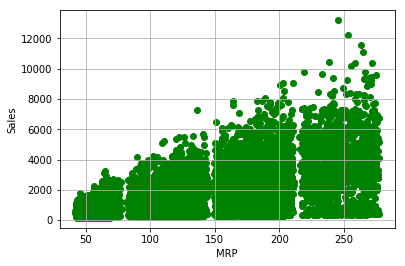

In [9]:
plt.scatter(medicineDF.Medicine_MRP, medicineDF.Counterfeit_Sales, color='green')
plt.xlabel('MRP')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

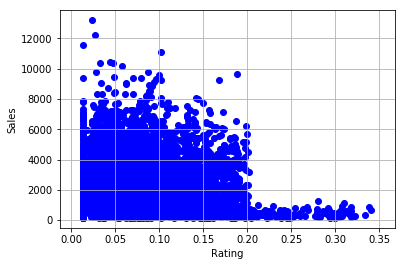

In [40]:
plt.scatter(medicineDF.Availability_rating, medicineDF.Counterfeit_Sales, color='blue')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

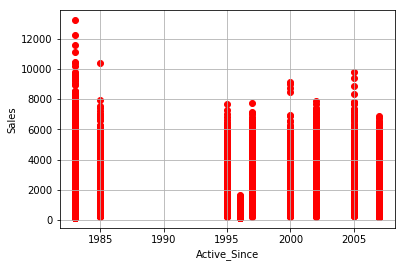

In [41]:
import matplotlib.pyplot as plt
plt.scatter(medicineDF.Active_Since, medicineDF.Counterfeit_Sales, color='red')
plt.xlabel('Active_Since')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

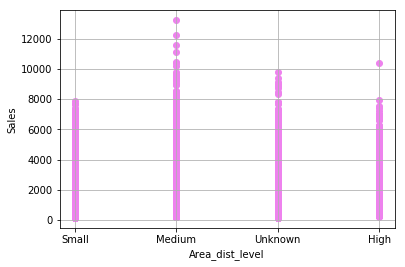

In [58]:
#plt.scatter(medicineDF.loc[medicineDF.Area_City_Type == 'Tier 3', ['Counterfeit_Sales']]['Counterfeit_Sales'], medicineDF.loc[medicineDF.Area_City_Type == 'Tier 3', ['Area_City_Type']]['Area_City_Type'], color='black')
plt.scatter(medicineDF.Area_dist_level, medicineDF.Counterfeit_Sales, color='violet')
plt.xlabel('Area_dist_level')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
def tier(x):
    if x == 'Tier 1':
        return 1
    elif x == 'Tier 2':
        return 2
    else:
        return 3
medicineDF.Area_City_Type.apply(tier)

#medicineDF.Counterfeit_Weight.isna().value_counts()

0       1
1       3
2       1
3       1
4       1
5       2
6       3
7       3
8       1
9       3
10      3
11      3
12      1
13      2
14      3
15      3
16      1
17      3
18      3
19      2
20      2
21      2
22      2
23      2
24      1
25      2
26      2
27      2
28      3
29      3
       ..
6788    1
6789    2
6790    3
6791    3
6792    3
6793    2
6794    1
6795    2
6796    3
6797    2
6798    1
6799    1
6800    1
6801    2
6802    1
6803    1
6804    2
6805    2
6806    2
6807    2
6808    2
6809    1
6810    3
6811    1
6812    3
6813    1
6814    1
6815    2
6816    2
6817    3
Name: Area_City_Type, Length: 6818, dtype: int64

In [61]:
print(medicineDF.Counterfeit_Weight.median())
print(medicineDF.Counterfeit_Weight.mean())

13.8
14.115056617126996


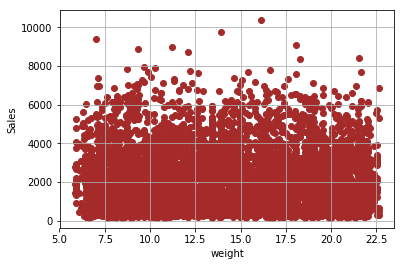

In [62]:
plt.scatter(medicineDF.Counterfeit_Weight, medicineDF.Counterfeit_Sales, color='brown')
plt.xlabel('weight')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
np.nan
medicineDF.shape

(6818, 12)

In [8]:
medicineDFTest = pd.read_csv(r"C:\Users\Dell\Downloads\Machine Learning Course Material\Edvancer\Project Work\Case Study 3 - Counterfeit Medicines Sales Prediction\counterfeit_test.csv")

In [9]:
medicineDF['Data'] = 'Train'
medicineDFTest['Data'] = 'Test'

In [10]:
medicineDFTest['Counterfeit_Sales'] = np.nan
medicineDFTest = medicineDFTest[medicineDF.columns]
medicineTrain = pd.concat([medicineDF, medicineDFTest])
#medicineTrain = medicineTrain.loc[~medicineTrain.Counterfeit_Weight.isna(), ['Counterfeit_Weight','Medicine_MRP','Availability_rating','Counterfeit_Sales','Data']]
medicineTrain = medicineTrain[['Medicine_Type','SidEffect_Level','Area_Type','Medicine_MRP','Availability_rating','Counterfeit_Sales','Data']]

In [17]:
medicineTrain.shape

(8523, 7)

In [229]:
'''
medianVal = medicineTrain.Counterfeit_Weight.median()
medicineTrain.Counterfeit_Weight = medicineTrain.Counterfeit_Weight.fillna(value=medianVal)
'''
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
medicineTrain[['Counterfeit_Weight']] = imputer.fit_transform(medicineTrain[['Counterfeit_Weight']])

In [39]:
medicineTrain.head(3)

,Medicine_Type,SidEffect_Level,Area_Type,Medicine_MRP,Availability_rating,Counterfeit_Sales,Data
0,Antimalarial,critical,DownTown,160.2366,0.070422,1775.5026,Train
1,Mstablizers,mild,CityLimits,110.4384,0.013000,3069.1520,Train
2,Cardiac,mild,DownTown,259.4092,0.060783,2603.0920,Train


In [11]:
cat_vars = medicineTrain.select_dtypes(['object']).columns
cat_vars[:-1]

Index(['Medicine_Type', 'SidEffect_Level', 'Area_Type'], dtype='object')

In [12]:
for cols in cat_vars[:-1]:
    cc_dummy = pd.get_dummies(medicineTrain[cols], prefix=cols, drop_first=True)
    #print(cc_dummy.head(2))
    medicineTrain = pd.concat([medicineTrain, cc_dummy],1)
    medicineTrain.drop([cols], 1, inplace=True)

In [13]:
medicineTrain.columns

Index(['Medicine_MRP', 'Availability_rating', 'Counterfeit_Sales', 'Data',
       'Medicine_Type_Antacids', 'Medicine_Type_Antibiotics',
       'Medicine_Type_Antifungal', 'Medicine_Type_Antimalarial',
       'Medicine_Type_Antipyretics', 'Medicine_Type_Antiseptics',
       'Medicine_Type_Antiviral', 'Medicine_Type_Cardiac',
       'Medicine_Type_Hreplacements', 'Medicine_Type_Mstablizers',
       'Medicine_Type_MuscleRelaxants', 'Medicine_Type_OralContraceptives',
       'Medicine_Type_Statins', 'Medicine_Type_Stimulants',
       'Medicine_Type_Tranquilizers', 'SidEffect_Level_mild',
       'Area_Type_DownTown', 'Area_Type_Industrial',
       'Area_Type_MidTownResidential'],
      dtype='object')

In [14]:
from sklearn import linear_model
X = medicineTrain.loc[medicineTrain.Data == 'Train', medicineTrain.columns.difference(['Counterfeit_Sales','Data'])] # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = medicineTrain.loc[medicineTrain.Data == 'Train', ['Counterfeit_Sales']] # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
Op = regr.predict(medicineTrain.loc[medicineTrain.Data == 'Test', ['Counterfeit_Weight','Medicine_MRP','Availability_rating']])

C:\Installed_Apps\Anaconda3-v2\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10)

In [18]:
regrVal = linear_model.LinearRegression()
regrVal.fit(X,Y)
op = regrVal.predict(x_test)
mean_absolute_error(op, y_test.values)

814.9475575478193

In [30]:
1-717/1660

0.5680722891566266

In [66]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

#random forest model creation
rfc= RandomForestRegressor()
rfc.fit(X, Y)
#---------------------------------------------------------------------------------
#rfc.fit(x_train, y_train)
# Out[65] : 0.5020447384376214
#---------------------------------------------------------------------------------
#predictions
rfc_predict= rfc.predict(x_test)

C:\Installed_Apps\Anaconda3-v2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [67]:
1-mean_absolute_error(rfc_predict, y_test.values)/1660

0.8029896670847614

In [32]:
testDF = medicineTrain.loc[medicineTrain.Data == 'Test', medicineTrain.columns.difference(['Counterfeit_Sales','Data'])]
final_predictions = regrVal.predict(testDF)
final_predictions_RF = rfc.predict(testDF)

NameError: name 'rfc' is not defined

In [139]:
final_DF = pd.DataFrame([medicineDFTest.Medicine_ID.values,final_predictions.reshape(1,1705)[0]]).transpose()
final_DF.columns = ['Medicine_ID','Counterfeit_Sales']

In [153]:
final_DF.to_csv("linearReggression_submission.csv", index=False)

In [138]:
final_predictions.reshape(1,1705)[0]
#final_predictions.shape

array([2799.07037241, 4023.50482397, 1507.77772528, ..., 2844.03183213,
       3895.76704696, 3830.25275023])

In [149]:
final_predictions_RF

array([2523.32916, 3364.90036, 1670.50594, ..., 3179.07558, 3461.90742,
       3248.85142])

In [150]:
mean_absolute_error(final_predictions.reshape(1,1705)[0], final_predictions_RF)

504.07572501053517

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, Y)
mse = mean_squared_error(y_test, clf.predict(x_test))
mae = mean_absolute_error(y_test, clf.predict(x_test))
print("MSE: %.4f" % mse)
print("MAE: %.4f" % mae)


C:\Installed_Apps\Anaconda3-v2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 1040906.0862
MAE: 717.0227


In [40]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 682

In [34]:
final_predictions_XGB = clf.predict(testDF)

In [36]:
final_DF = pd.DataFrame([medicineDFTest.Medicine_ID.values,final_predictions_XGB]).transpose()
final_DF.columns = ['Medicine_ID','Counterfeit_Sales']

In [37]:
final_DF

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2093.19
1,ECE94,4098.32
2,SAD14,1509.64
3,EQV63,423.768
4,AIR10,421.602
5,LIC37,554.327
6,EXZ14,3693.25
7,UCB79,3678.54
8,IDJ12,5519.47
9,KLQ71,1538.76
